In [18]:
import pandas as pd

In [19]:
df=pd.read_csv('Iris.csv')

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
x=df.iloc[:,0:3]
y=df['Species']
obj=StandardScaler()
x=obj.fit_transform(x)
le.fit_transform(['Iris-setosa','Iris-versicolor','Iris-virginica'])

array([0, 1, 2], dtype=int64)

In [23]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3)

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [25]:
print(knn.score(xtest,ytest))

0.9777777777777777


In [26]:
from  sklearn import metrics
from sklearn.metrics import confusion_matrix
ypred=knn.predict(xtest)
confusion_matrix(ytest,ypred)

array([[16,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 15]], dtype=int64)

In [27]:
k_range=range(1,26)
error1={}
errorlist=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    error1[k]=1-metrics.accuracy_score(ytest,ypred)
    errorlist.append(1-metrics.accuracy_score(ytest,ypred))


In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error')

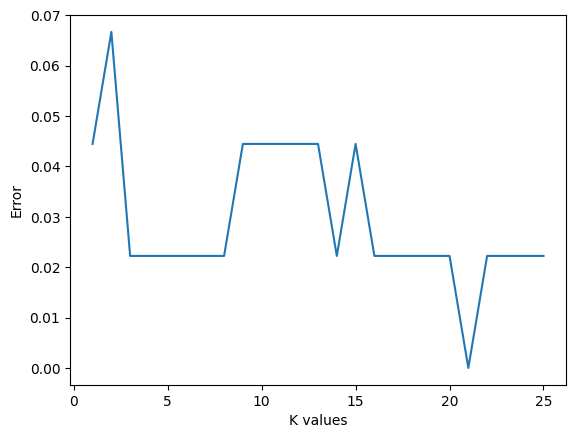

In [29]:
plt.plot(k_range, errorlist)
plt.xlabel("K values")
plt.ylabel("Error")